In [642]:
#These are the libraries you can use.  You may add any libraries directy related to threading if this is a direction
#you wish to go (this is not from the course, so it's entirely on you if you wish to use threading).  Any
#further libraries you wish to use you must email me, james@uwaterloo.ca, for permission.

from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import datetime

## Group Assignment
### Team Number: 17
### Team Member Names: Jack, Jennifer, Justus, Precious
### Team Strategy Chosen: Market Meet (Market Beat or Market Meet)

Disclose any use of AI for this assignment below (detail where and how you used it).  Please see the course outline for acceptable uses of AI.


## Introduction
When finding an objective weighting system for our sorting and selection to operate with, we found it beneficial to draw upon more than just the returns of the stock but instead a combination of the returns, the stock’s market capitalization, its volatility, and the tracking error found from comparing the individual stock to the market. Although it may seem intuitive to just select the stocks that provide the closest average return to the market for our portfolio, the inclusion of the other three metrics in our rating index helps us to assess more than just the returns of each stock, but their overall place in the market.

In [646]:
## Read in portfolio of tickers and create a dataframe
start_date_required = '2023-10-01'
end_date_required = '2024-09-30'
count_days = 0
monthly_vol = []

# This function counts the monthly volume of the stock and finds the average monthly volume
def count_volume(ticker):
    ticker_hist = ticker.history(start=start_date_required, end=end_date_required)
    ticker_hist.index = ticker_hist.index.strftime('%Y-%m-%d')
    # Oct 2023
    filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-10-01')
                         & (ticker_hist.index < '2023-11-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Nov 2023
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-11-01')
                             & (ticker_hist.index < '2023-12-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Dec 2023
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2023-12-01')
                         & (ticker_hist.index < '2024-01-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # jan 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-01-01')
                             & (ticker_hist.index < '2024-02-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Feb 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-02-01')
                             & (ticker_hist.index < '2024-03-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # March 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-03-01')
                             & (ticker_hist.index < '2024-04-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # April 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-04-01')
                             & (ticker_hist.index < '2024-05-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # May 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-05-01')
                             & (ticker_hist.index < '2024-06-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
    
        # June 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-06-01')
                             & (ticker_hist.index < '2024-07-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # July 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-07-01')
                             & (ticker_hist.index < '2024-08-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
        # Aug 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-08-01')
                             & (ticker_hist.index < '2024-09-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))
         
        # Sept 2024
        filtered_df = ticker_hist.loc[(ticker_hist.index >= '2024-09-01')
                             & (ticker_hist.index < '2024-10-01')]
    if len(filtered_df) >= 18:
        monthly_vol.append(np.mean(filtered_df['Volume']))

    return np.mean(monthly_vol)


In [647]:
## function that takes in a dataframe of stock tickers removes unlisted, low volume or stocks not denominated in USD or CAD
def remove_unwanted(df):
    drop_rows = []
    for i in range(len(df) - 1):
        try:
            ticker = yf.Ticker(df.iloc[i,0])
            currency = ticker.info.get('currency')
            if currency not in ['USD', 'CAD']:
                drop_rows.append(i)
                continue
            if (count_volume(ticker) < 100000):
                drop_rows.append(i)
                continue
        except: 
            drop_rows.append(i)
            continue
    df.drop(drop_rows, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [648]:
# Retrieving tickers from csv file
tickers = pd.read_csv('Tickers_Example.csv', header=None)
tickers = tickers.rename(columns={0: 'Ticker'})

df = remove_unwanted(tickers)
df

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/STOCK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=STOCK&crumb=0SiFeB4KbxW


,Ticker
0,ABBV
1,ABT
2,ACN
3,AIG
4,AMZN
5,AXP
6,BA
7,BAC
8,BB.TO
9,BIIB


## Choosing our Time Frame For S&P500 and TSX60
We decided to create our portfolio with a three year time period, from 2021-01-01 to 2024-11-01. Choosing a three year period allows us to mitigate short term market volatility that could distort the relationship between the portfolio and the S&P500 and TSX60 indices. For instance, a shorter time period such as one year may include anomalies from recent trends in the market that do not accurately reflect the portfolio long term. This is especially important when calculating volatility as it can be inflated by short-term price swings. Furthermore, a three year time period is long enough to capture different market cycles to provide a more accurate representation of how the portfolio will perform under different market conditions. This ensures the portfolio is not biased towards a single market trend, allowing us to better evaluate its consistency. 

In [650]:
# Retrieving data from S&P500 
start_date = '2021-01-01' # Used for now
end_date = '2024-11-02'

sp500_ticker = yf.Ticker('^GSPC')
sp500 = sp500_ticker.history(start=start_date, end=end_date, interval='1mo')[['Close']]
sp500.index = sp500.index.strftime('%Y-%m-%d')
sp500_returns = sp500.ffill().pct_change().dropna()
sp500_returns.rename(columns={'Close': 'S&P500 Returns'}, inplace=True)

In [651]:
# Getting tsx historical data
tsx_ticker = yf.Ticker('XIU.TO')
tsx = tsx_ticker.history(start=start_date,end=end_date, interval='1mo')[['Close']]
tsx.index = tsx.index.strftime('%Y-%m-%d')
#tsx.head()
tsx_returns = tsx.ffill().pct_change().dropna()
tsx_returns.rename(columns={'Close': 'TSX60 Returns'}, inplace=True)

In [652]:
# combining dataframe to get total pct change 
sp500tsx60 = sp500_returns.join(tsx_returns)
sp500tsx60['Total % Change'] = sp500tsx60.mean(axis=1)
sp500tsx60.head()

,S&P500 Returns,TSX60 Returns,Total % Change
Date,,,
2021-02-01,0.026091,0.036510,0.031301
2021-03-01,0.042439,0.052981,0.047710
2021-04-01,0.052425,0.023050,0.037737
2021-05-01,0.005486,0.030849,0.018168
2021-06-01,0.022214,0.033423,0.027819


In [653]:
sp500tsx60['Total % Change'].mean()

0.011265215309763106

In [654]:
# The percentage change should be (end_price - start_price) / start_price
sp500_start_price = sp500.iloc[0]['Close']
sp500_end_price = sp500.iloc[-1]['Close']
sp500_pct_change = (sp500_end_price - sp500_start_price) / sp500_start_price

tsx_start_price = tsx.iloc[0]['Close']
tsx_end_price = tsx.iloc[-1]['Close']
tsx_pct_change = (tsx_end_price - tsx_start_price) / tsx_start_price

avg_pct_change = (sp500_pct_change + tsx_pct_change) / 2
print('The average percentage change of the S&P 500 and TSX 60 over the three-year period is approximately ',
      np.round(avg_pct_change * 100, 4), '%.', sep='')


The average percentage change of the S&P 500 and TSX 60 over the three-year period is approximately 61.0253%.


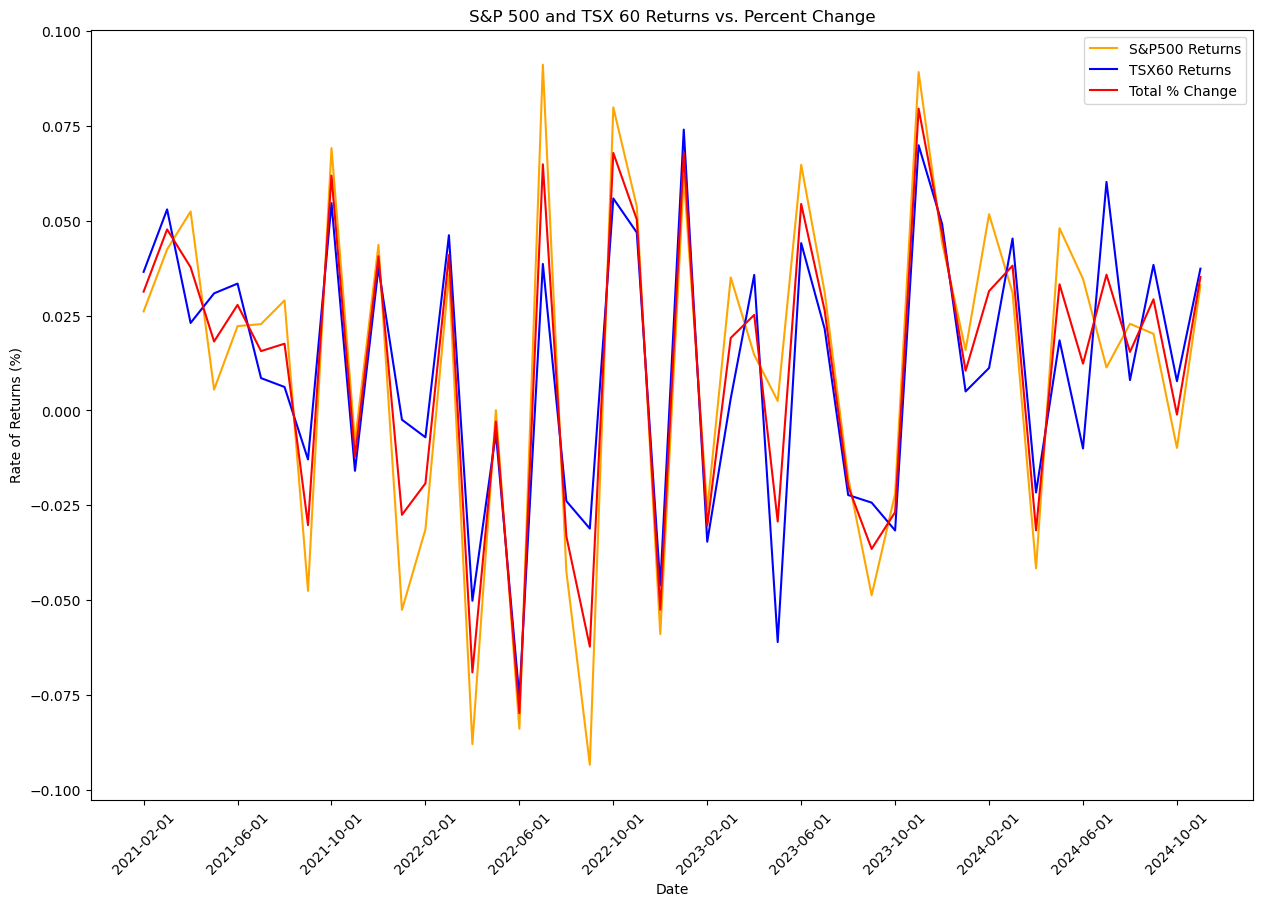

In [655]:
# Plotting the S&P 500 and TSX 60 Returns alongside the percent change
plt.figure(figsize=(15,10))

plt.plot(sp500tsx60["S&P500 Returns"], color = 'orange',  label="S&P500 Returns")
plt.plot(sp500tsx60["TSX60 Returns"], color = 'blue',  label="TSX60 Returns")
plt.plot(sp500tsx60["Total % Change"], color = 'red',  label="Total % Change")
plt.xticks( ["2021-02-01", "2021-06-01", "2021-10-01", "2022-02-01", "2022-06-01", "2022-10-01", 
             "2023-02-01", "2023-06-01", "2023-10-01", "2024-02-01", "2024-06-01", "2024-10-01"], rotation = 45)

plt.title('S&P 500 and TSX 60 Returns vs. Percent Change')
plt.ylabel('Rate of Returns (%)')
plt.xlabel('Date')
plt.legend(loc='best')

The graph above analyzes the Rate of Return for the S&P 500 and the TSX and thier total percent change. Using these metrics we can see the general trend that is being followed by both indexes, with either rising and falling by about the same amount as the other, made even more clear by the overlapping lines. Considering historical rates of return can tell us about how profitable an investment was in the past and can lead use to infer about the future. In our cause, looking at this data gives us a pathway that we would like our own ideal portfolio to follow. If our portfolio can also match the pace of the trend lines above, and hence match around the same rate of return historically, then it is more likely to meet the market index as it's rate or returns will also follow the S&P and TSX 60 as closesly as possible.

In [657]:
sp500 = sp500tsx60["S&P500 Returns"].std()
tsx60 = sp500tsx60["TSX60 Returns"].std()

print("The standard deviation of the TSX60 over 3 years of data is:", np.round(tsx60, 5))
print("The standard deviation of the S&P 500 over 3 years of data is:", np.round(sp500, 5))

The standard deviation of the TSX60 over 3 years of data is: 0.03648
The standard deviation of the S&P 500 over 3 years of data is: 0.04651


## Determining Our Ideal Stocks In Our Portfolio

### Market Cap
First, we decided upon including market capitalization in our stock picking method because of how the S&P 500 and the TSX 60 are created and maintained. In both of these indexes, a larger cap stock is given more weight in the index than a smaller cap stock, as the goal of these indexes is to provide a sample that represents the entire market. What this means for us is if we pick a higher market capitalization stock, it is more likely to influence the market indexes we are comparing our portfolio to.  

### Tracking Error
The second special metric we are using to determine our portfolio is tracking error. Tracking error is defined as

Tracking Error = Standard Deviation of (P - B)

Where P is the percent return of a portfolio or individual stock and B is the benchmark or market return. This metric proves very useful in determining the risk of a stock relative to the market, as a stock that moves consistently with the market will often have a very low tracking error. We decided to include this metric in our portfolio development because, in the case of a long term portfolio, we want to mitigate risk, not invite it. For example, if a stock were to have adequate returns for our portfolio but a very high tracking error compared to the market, the stock is risky and may lead to uncertainty in a long term portfolio. 


In [659]:
# Default weight on the factors
market_value_weight = 1 # Decide if we need this later
returns_weight = 0.001
tracking_error_weight = 0.1

# achieve data from yahoo finance
market_returns = sp500tsx60['Total % Change'].mean()
total_market_value = 1000000000000 # Change later

# rating gives every stock a rating and sorts them in non-increasing order
# Four factors to be considered:
    # 1. Market Value
    # 2. Returns
    # 3. Tracking Error 
# A higher rating means the stock aligns better with the true market index.
def rating(dataframe):
    for stock, row in dataframe.iterrows():
        # Get the closing prices of the stock 
        stock_tick = yf.Ticker(row["Ticker"])
        stock_data = stock_tick.history(start=start_date, end=end_date, interval='1mo')[['Close']]
        #stock_data.index = stock_data.index.strftime('%Y-%m-%d')
        # calculate returns for stock
        stock_returns_df = stock_data.ffill().pct_change().dropna()
        
        # Step 1: Calculate Market Value Score
        stock_market_value = stock_tick.fast_info['marketCap']
        market_value_score = stock_market_value / total_market_value
        dataframe.at[stock, "Market value score"] = market_value_score

        # Step 2: Calculate Returns Score
        stock_returns = stock_returns_df['Close'].mean() 
        returns_score = abs(stock_returns - market_returns)
        dataframe.at[stock, "Returns score"] = 1 / returns_score

        # Step 3: Calculate tracking error score 
        tracking_error = (stock_returns_df['Close'] - market_returns).std()
        dataframe.at[stock, "Tracking error score"] = 1 / tracking_error
        
        # Step 4: Calculate rating of the stock based on weight
        dataframe["Rating"] = dataframe["Market value score"] * market_value_weight + dataframe["Returns score"] * returns_weight + dataframe["Tracking error score"] * tracking_error_weight 
                              

    # Sort the rating in descending order
    sorted_df = dataframe.sort_values(by='Rating', ascending=False)
    return sorted_df

df_ratings = rating(df)
df_ratings

,Ticker,Market value score,Returns score,Tracking error score,Rating
35,USB,0.078587,4791.620718,10.629086,5.933116
4,AMZN,2.162566,495.621790,10.672984,3.725486
20,MRK,0.241895,1401.294840,15.008259,3.144015
23,PG,0.402460,609.547593,19.962957,3.008304
16,KO,0.271482,469.434144,20.279252,2.768841
21,PEP,0.215590,209.677623,22.451146,2.670383
32,UNH,0.537025,256.525199,17.491345,2.542684
15,CL,0.076194,251.412219,21.773016,2.504908
13,C,0.129704,1191.067042,11.705971,2.491368
2,ACN,0.221456,931.722413,13.175569,2.470736


In [660]:
chosen_stocks = []
def select_stocks(numStocks, df):
    chosen_stocks = df.iloc[:numStocks, :].copy()
    return chosen_stocks[['Ticker', 'Rating']]

chosen_stocks = select_stocks(24, df_ratings)
chosen_stocks

,Ticker,Rating
35,USB,5.933116
4,AMZN,3.725486
20,MRK,3.144015
23,PG,3.008304
16,KO,2.768841
21,PEP,2.670383
32,UNH,2.542684
15,CL,2.504908
13,C,2.491368
2,ACN,2.470736


In [661]:
def calculate_weight(dataframe):
    n = len(dataframe)
    
     # Step 1: Initialize reassign_list with proportional values
    total_rating = dataframe['Rating'].sum()
    reassign_dataframe = dataframe[['Ticker', 'Rating']].copy()
    reassign_dataframe['proportional_rating'] = reassign_dataframe['Rating'] / total_rating

    # Step 2: Set each weight to the minimum weight
    min_weight = 100 / (2 * n) / 100
    max_weight = 0.15
    dataframe['Weight'] = min_weight
    remaining_weight = 1 - dataframe['Weight'].sum()
    
    # Step 3: Assign the remaining 
    while remaining_weight > 0:
        total_proportional_rating = reassign_dataframe['proportional_rating'].sum()
        adjustment_factor = remaining_weight / total_proportional_rating
        
        reassign_dataframe['additional_weight'] = reassign_dataframe['proportional_rating'] * adjustment_factor
        reassign_dataframe['new_weight'] = reassign_dataframe['additional_weight'] + dataframe.set_index('Ticker').loc[reassign_dataframe['Ticker'], 'Weight'].values

        for index, row in reassign_dataframe.iterrows():
            stock_name = row['Ticker']
            new_weight = row['new_weight']

            if new_weight > max_weight:
                excess = new_weight - max_weight
                dataframe.loc[dataframe['Ticker'] == stock_name, 'Weight'] = max_weight
                remaining_weight -= row['additional_weight'] - excess
                reassign_dataframe.drop(index, inplace=True)
            else:
                dataframe.loc[dataframe['Ticker'] == stock_name, 'Weight'] = new_weight
                remaining_weight -= row['additional_weight']

        remaining_weight = max(0, remaining_weight)

    dataframe['Weight'] = dataframe['Weight'] * 100 / dataframe['Weight'].sum()
    return dataframe

Portfolio_Final = calculate_weight(chosen_stocks)
Portfolio_Final
# testing
# chosen = select_stocks(24, tickers)
# data_1 = {
#     'Ticker': chosen,
#     'Rating': [0.01] * 19 + [0.99] * 5
# }

# dataframe_1 = pd.DataFrame(data_1)
# dataframe_1['Rating'].sum()
# print(calculate_weight(dataframe_1))

,Ticker,Rating,Weight
35,USB,5.933116,7.126794
4,AMZN,3.725486,5.250193
20,MRK,3.144015,4.755912
23,PG,3.008304,4.640550
16,KO,2.768841,4.436994
21,PEP,2.670383,4.353299
32,UNH,2.542684,4.244749
15,CL,2.504908,4.212637
13,C,2.491368,4.201127
2,ACN,2.470736,4.183589


In [664]:
# port_build_date = "2023-11-25" # According to the requirement
# port_build_end = "2024-11-19" # Has to be one day later
price_date = "2023-11-25"

exchange_ticker = yf.Ticker('CADUSD=x')
exchange_rate_df = exchange_ticker.history(start=start_date, end=end_date, interval='1d') 
exchange_rate = exchange_rate_df["Close"].mean()
def build_portfolio(stocks):
   
    n = 1000000  # budget
    portfolio = []
    for stock, row in stocks.iterrows():
        
        # Grabbing Data
        stock = yf.Ticker(row["Ticker"])
        weight = row["Weight"] / 100
        stock_data = stock.history(start=start_date, end=end_date, interval='1d') 
        stock_start_price = stock_data.iloc[0]['Close'] # price on the specified day
        stock_end_price = stock_data.iloc[-1]['Close']
        
        # Exchanging currency if needed
        if stock.info["currency"] == "USD":
            cad_stock_start_price = stock_start_price * (1 / exchange_rate)
            cad_stock_end_price = stock_end_price * (1 / exchange_rate)
        else: 
            cad_stock_start_price = stock_start_price
            cad_stock_end_price = stock_end_price
            
        # Getting number of shares with fee
        price_data = stock.history(start=price_date, end=end_date, interval='1d') 
        price = price_data.iloc[0]['Close'] # The closing price of 2023-11-25
        shares_cost = n * weight
        shares = shares_cost / cad_stock_start_price
        fee = max(3.95, shares * 0.001)
        fee_cost = shares_cost - fee
        shares = fee_cost / cad_stock_start_price
        value = shares * price
        actual_value = shares * cad_stock_end_price
        
        # Adding our stock to portfolio
        portfolio.append({
            'Ticker': row["Ticker"],
            'Price': round(price, 2),
            'Currency': stock.fast_info["currency"],
            'Shares': round(shares, 2), 
            'Value': round(value, 2),
            'Weight': row["Weight"],
            'Actual Value': round(actual_value, 2) # Testing
        })
        
        # Note: Find a way to fix floating point rounding 
    
    # Creating our final dataframe  
    Portfolio_Final = pd.DataFrame(portfolio)
    Portfolio_Final.index += 1
    return Portfolio_Final

portfolio = build_portfolio(Portfolio_Final)
print(portfolio)
# portfolio_returns = portfolio['Value'].ffill().pct_change().dropna()

# portfolio['Weight'].sum() # which is 100% and correct
portfolio_value = portfolio['Actual Value'].sum()
portfolio_return = (portfolio_value - 1000000) / 1000000
actual_return = avg_pct_change
print("The return of Final_Portfolio is ", np.round(portfolio_return * 100, 4), "%, and the actual return is ", np.round(actual_return * 100, 4), "%.", sep='')

   Ticker   Price Currency   Shares      Value    Weight  Actual Value
1     USB   35.14      USD  1382.28   48566.90  7.126794      86806.19
2    AMZN  147.73      USD   251.00   37080.43  5.250193      65215.76
3     MRK   98.81      USD   525.50   51924.73  4.755912      70279.30
4      PG  147.57      USD   283.18   41787.63  4.640550      61372.32
5      KO   56.71      USD   717.79   40703.10  4.436994      61255.09
6     PEP  163.24      USD   255.69   41738.83  4.353299      55578.86
7     UNH  535.44      USD    97.58   52248.28  4.244749      72701.04
8      CL   75.45      USD   417.95   31532.50  4.212637      51204.42
9       C   43.46      USD   618.96   26901.13  4.201127      51309.72
10    ACN  327.17      USD   131.62   43061.53  4.183589      59723.02
11  RY.TO  113.71      CAD   463.65   52721.17  4.159646      78875.97
12  TD.TO   79.03      CAD   670.26   52973.41  4.052069      51448.84
13    TXN  148.37      USD   208.58   30947.32  3.978826      56107.17
14    

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.